# Machine Learning with Pmdarima: Stock Price Prediction

In [1]:
# Importing a library for mathematical operations.

import numpy as np

# Importing a library for data manipulation.

import pandas as pd

# Importing a library for data visualization.

import matplotlib.pyplot as plt

# Importing libraries for machine learning.

from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Importing a library for warning filtration.

from warnings import filterwarnings
filterwarnings("ignore")

## Data Collection

In [2]:
# Reading data into a Pandas DataFrame.

data = pd.read_csv("Data.csv")

In [3]:
# Printing first five rows of data.

data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


## Data Cleaning

In [4]:
# Printing number of missing values in each column.

data.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [5]:
# Dropping rows with missing values.

data.dropna(inplace=True)

## Data Preprocessing

In [6]:
# Setting Date column as index.

data.set_index("Date", inplace=True)

In [7]:
# Printing first five rows of data.

data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,4.322621e+11,1416.0,3427.0,0.4971
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,1.761205e+11,432.0,1718.0,0.6204
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,3.214631e+12,135.0,50912.0,0.9900
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,3.354910e+11,268.0,4312.0,0.7918
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,3.700840e+11,273.0,4073.0,0.6799


## Feature Engineering

In [8]:
# Printing columns.

data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [9]:
# Selecting features.

features = ["High", "Low", "Volume", "Turnover", "Trades"]

# Calculating rolling window mean for selected features.

for feature in features:
    
    # Adding indivisual columns for rolling window mean for each selected feature.
    
    data[feature + "_Rolling_Window_3_Mean"] = data[feature].rolling(window=3).mean()
    data[feature + "_Rolling_Window_7_Mean"] = data[feature].rolling(window=7).mean()
    
# Calculating rolling window standard deviation for selected features.

for feature in features:
    
    # Adding indivisual columns for rolling window standard deviation for each selected feature.
    
    data[feature + "_Rolling_Window_3_Standard_Deviation"] = data[feature].rolling(window=3).std()
    data[feature + "_Rolling_Window_7_Standard_Deviation"] = data[feature].rolling(window=7).std()

In [10]:
# Printing number of missing values in each column.

data.isnull().sum()

Symbol                                          0
Series                                          0
Prev Close                                      0
Open                                            0
High                                            0
Low                                             0
Last                                            0
Close                                           0
VWAP                                            0
Volume                                          0
Turnover                                        0
Trades                                          0
Deliverable Volume                              0
%Deliverble                                     0
High_Rolling_Window_3_Mean                      2
High_Rolling_Window_7_Mean                      6
Low_Rolling_Window_3_Mean                       2
Low_Rolling_Window_7_Mean                       6
Volume_Rolling_Window_3_Mean                    2
Volume_Rolling_Window_7_Mean                    6


In [11]:
# Dropping rows with missing values.

data.dropna(inplace=True)

## Feature Selection

In [12]:
# Assigning feature matrix.

X = ["High_Rolling_Window_3_Mean", "High_Rolling_Window_7_Mean", "Low_Rolling_Window_3_Mean", "Low_Rolling_Window_7_Mean",
     "Volume_Rolling_Window_3_Mean", "Volume_Rolling_Window_7_Mean", "Turnover_Rolling_Window_3_Mean",
     "Turnover_Rolling_Window_7_Mean", "Trades_Rolling_Window_3_Mean", "Trades_Rolling_Window_7_Mean",
     "High_Rolling_Window_3_Standard_Deviation", "High_Rolling_Window_7_Standard_Deviation",
     "Low_Rolling_Window_3_Standard_Deviation", "Low_Rolling_Window_7_Standard_Deviation",
     "Volume_Rolling_Window_3_Standard_Deviation", "Volume_Rolling_Window_7_Standard_Deviation",
     "Turnover_Rolling_Window_3_Standard_Deviation", "Turnover_Rolling_Window_7_Standard_Deviation",
     "Trades_Rolling_Window_3_Standard_Deviation", "Trades_Rolling_Window_7_Standard_Deviation"]

# Assigning target vector.

y = ["VWAP"]

## Machine Learning

In [13]:
# Splitting data into random train and test subsets.

train_data = data[:1800]
test_data = data[1800:]

In [14]:
# Building an ARIMA model.

model = auto_arima(y=train_data[y], X=train_data[X], trace=True)

# Fitting model on training set.

model.fit(train_data[y], train_data[X])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20931.542, Time=2.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20925.228, Time=1.39 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20926.352, Time=1.43 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20926.324, Time=1.94 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32616.913, Time=1.29 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20929.238, Time=2.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 10.522 seconds


ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [15]:
# Predicting future values for testing set.

y_prediction = model.predict(n_periods=len(test_data), X=test_data[X])
y_prediction = np.array(y_prediction)

In [16]:
# Assigning predictions into a Pandas DataFrame.

predictions = pd.DataFrame(y_prediction)
predictions.columns = ["VWAP Predictions"]
predictions.set_index("VWAP Predictions", inplace=True)

# Printing predictions.

predictions

""
VWAP Predictions
2600.732684
2625.147876
2600.996129
2556.412399
2572.872101
...
3447.680799
3677.852747
3685.097352


In [17]:
# Adding a column for VWAP predictions.

test_data["VWAP_Predictions"] = y_prediction

In [18]:
# Printing mean absolute error, mean absolute percentage error, mean squared error and root mean squared error.

print("Mean Absolute Error: ", mean_absolute_error(test_data["VWAP"], test_data["VWAP_Predictions"]))
print("Mean Absolute Percentage Error: ", mean_absolute_percentage_error(test_data["VWAP"], test_data["VWAP_Predictions"]))
print("Mean Squared Error: ", mean_squared_error(test_data["VWAP"], test_data["VWAP_Predictions"]))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(test_data["VWAP"], test_data["VWAP_Predictions"])))

Mean Absolute Error:  124.6568189180956
Mean Absolute Percentage Error:  0.04179471756588027
Mean Squared Error:  35261.20893662427
Root Mean Squared Error:  187.779681905749


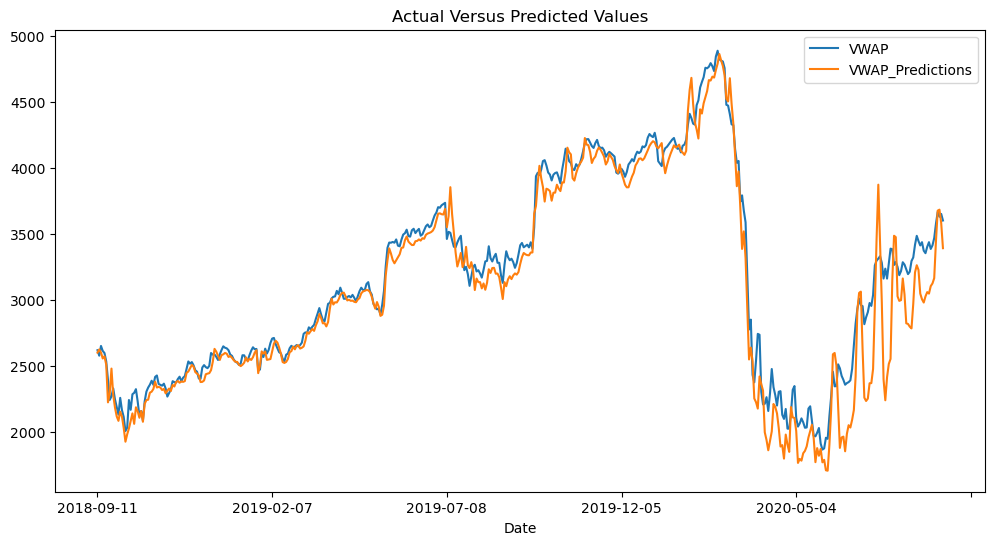

In [19]:
# Plotting a line plot for actual versus predicted values.

test_data[["VWAP", "VWAP_Predictions"]].plot(figsize=(12, 6))
plt.title("Actual Versus Predicted Values")
plt.show()